# Data interpolation

We have some data for the refractive index for gold, silver and water depending on the frequency. This data is provided for only a range og frequencies. Therefore, we need to interpolate the data to obtain values in different ranges.

Christopher Cooper used his own script to interpolate, and obtain certain values. I want to use scipy interpolation and compare. We try linear, cubic and spline interpolation, based on plot we will make a desicion. 

The raw data was obtained from the following papers:

* Silver and gold: [Johnson and Christy, 1972](http://fisica.ufpr.br/jfreire/EstadoSolido/optical%20contstants%20of%20noble%20metals.pdf)

* Water: [Hale and Querry, 1973](https://www.osapublishing.org/DirectPDFAccess/07C2E4BD-CCF7-B35F-A3AABC24CBEA7F9F_17737/ao-12-3-555.pdf?da=1&id=17737&seq=0&mobile=no)

You can extract refractive index data from the following data base (it has citation to the respective papers)
https://refractiveindex.info/


In [1]:
import numpy 
from matplotlib import pyplot
%matplotlib notebook

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
#Importing gold data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_g , n_g , k_g = numpy.loadtxt('gold_silver_water_raw-data/gold_JC72.txt', unpack=True)
lambda_g = lambda_g*1e3 #To convert to nm


In [4]:
def plot_refrac(lamb, n, k):
    
    """
    Plots the trend of the refractive index with the wavelength.
    Plots separately the real and imaginary part of the refractive index.
    
    Arguments:
    ----------
    lamb: array, wavelengths.
    n   : array, real part of refractive index. 
    k   : array, imaginary part of refractive index.
    
    Returns:
    --------
    Plots of refrac_index_real vs lambda, refrac_index_imaginary vs lambda. 
    """
    
    pyplot.figure(figsize=(12,4))  

    pyplot.subplot(121)
    
    pyplot.scatter(lamb,n, color='#2929a3') 
    
    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=25)
    pyplot.title('Real')
    pyplot.grid()
    
    
    pyplot.subplot(122)
    
    pyplot.scatter(lamb,k, color='#ff5733') 
    
    pyplot.xlabel('Wavelength [nm]')
    #pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=25)
    pyplot.title('Imaginary')
    pyplot.grid()

<IPython.core.display.Javascript object>


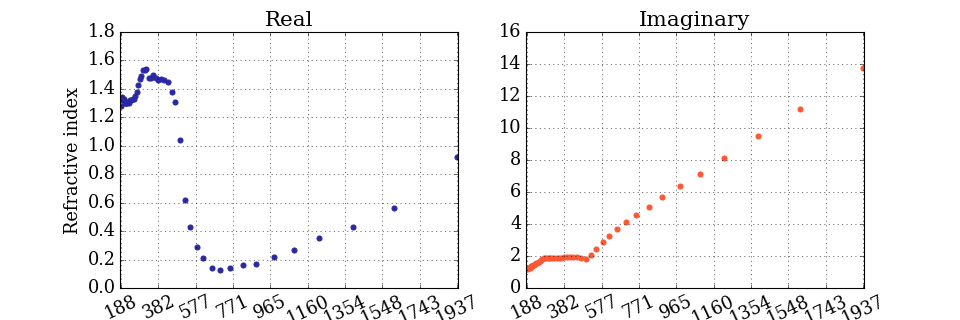

In [5]:
plot_refrac(lambda_g, n_g, k_g)

In [6]:
from scipy.interpolate import interp1d, splev, splrep

In [7]:
gold_real_LI = interp1d(lambda_g, n_g)
gold_real_CI = interp1d(lambda_g, n_g, kind='cubic')
gold_imag_LI = interp1d(lambda_g, k_g)
gold_imag_CI = interp1d(lambda_g, k_g, kind='cubic')

<IPython.core.display.Javascript object>


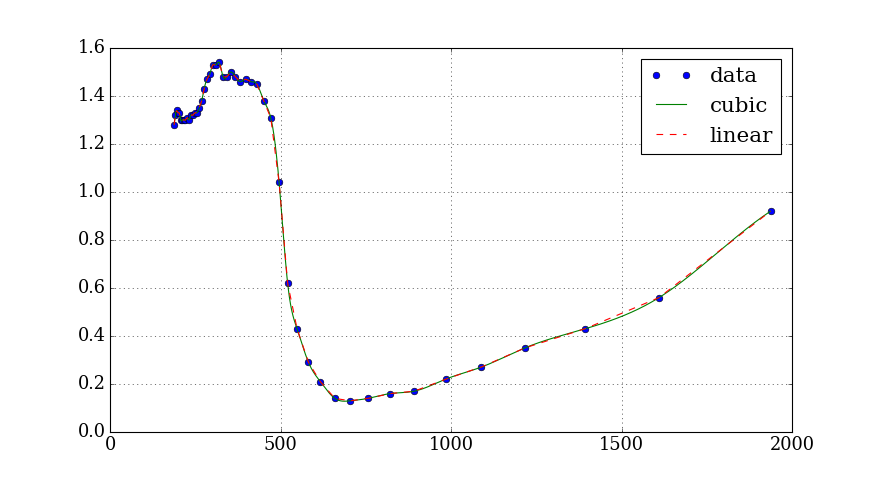

In [8]:
pyplot.figure(figsize=(11,6))  

lambda_g_new = numpy.linspace(min(lambda_g), max(lambda_g), num=1000, endpoint=True) 
pyplot.plot(lambda_g, n_g, 'o', lambda_g_new, gold_real_CI(lambda_g_new), '-', lambda_g_new, gold_real_LI(lambda_g_new), '--')
pyplot.legend(['data', 'cubic', 'linear'], loc='best')
#pyplot.xlim(180, 500) #uncomment this to check that cubic is not good
pyplot.grid()

In [31]:
print(gold_real_LI(380))
print(gold_imag_LI(380))


1.4622058823529411
1.9288088235294119


In [32]:
print(gold_real_CI(380))
print(gold_imag_CI(380))


1.4605801725973984
1.9296248997504866


<IPython.core.display.Javascript object>


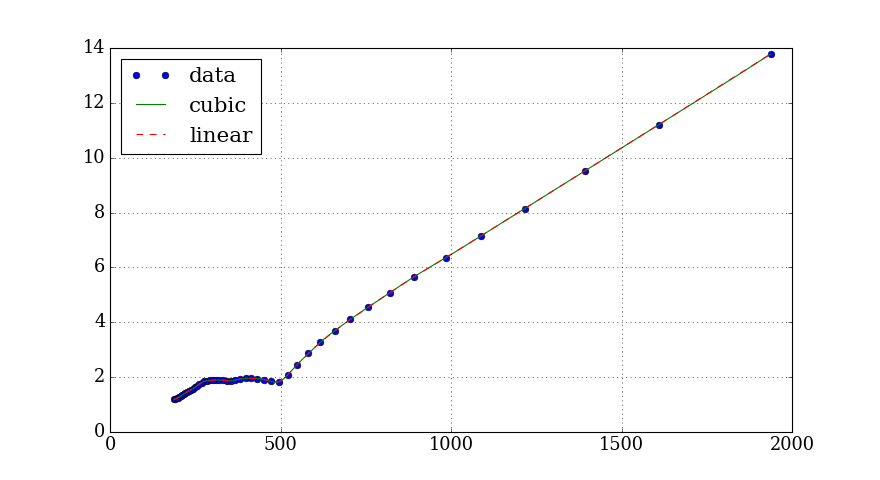

In [9]:
pyplot.figure(figsize=(11,6))  

pyplot.plot(lambda_g, k_g, 'o', lambda_g_new, gold_imag_CI(lambda_g_new), '-',  lambda_g_new, gold_imag_LI(lambda_g_new), '--')
pyplot.legend(['data', 'cubic', 'linear'], loc='best')
#pyplot.xlim(150, 700) #uncomment this to check that cubic is not worth it
pyplot.grid()

In [10]:
#it returns quite the same than chris interpolation (linear) 
print(gold_real_LI(340))
print(gold_imag_LI(340))

1.48
1.8737272727272727


In [11]:
#let's see if we do splines

gold_real_spl = splrep(lambda_g, n_g)
gold_imag_spl = splrep(lambda_g, k_g)

g_real_spl = splev(lambda_g_new, gold_real_spl)
g_imag_spl = splev(lambda_g_new, gold_imag_spl)

In [36]:
g_real_spl_test = splev(380, gold_real_spl)
g_imag_spl_test = splev(380, gold_imag_spl)

In [37]:
print(g_real_spl_test)
print(g_imag_spl_test)

1.4605801725974008
1.9296248997504868


<IPython.core.display.Javascript object>


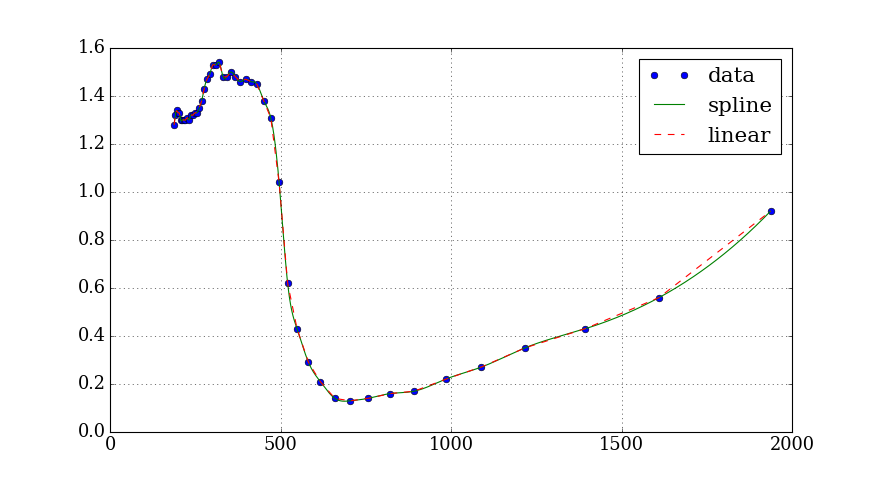

In [12]:
pyplot.figure(figsize=(11,6))  

pyplot.plot(lambda_g, n_g, 'o', lambda_g_new, g_real_spl, '-', lambda_g_new, gold_real_LI(lambda_g_new), '--')
#pyplot.xlim(180, 220) #uncomment this to check that spline is not good
pyplot.legend(['data', 'spline', 'linear'], loc='best')

pyplot.grid()

<IPython.core.display.Javascript object>


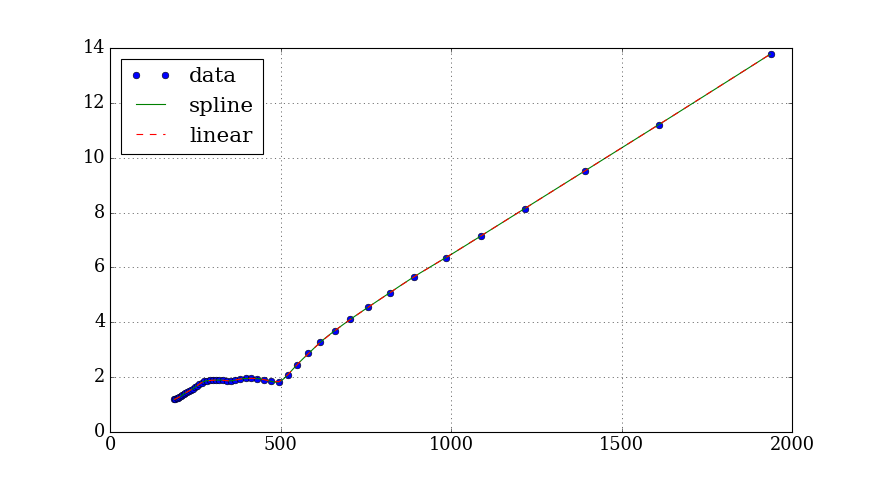

In [13]:
pyplot.figure(figsize=(11,6))  

pyplot.plot(lambda_g, k_g, 'o', lambda_g_new, g_imag_spl, '-', lambda_g_new, gold_imag_LI(lambda_g_new), '--')
#pyplot.xlim(380, 600) #uncomment this to check that spline is not worth it
pyplot.legend(['data', 'spline', 'linear'], loc='best')

pyplot.grid()

In [14]:
#lambda_g[32:37]

In [15]:
#In the range chris plot the wavelength for gold (460-560 nm)
#plot_refrac(lambda_g[32:37], n_g[32:37], k_g[32:37])

In [16]:
#Importing silver data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72.txt', unpack=True)
lambda_s = lambda_s*1e3 #To convert to nm

<IPython.core.display.Javascript object>


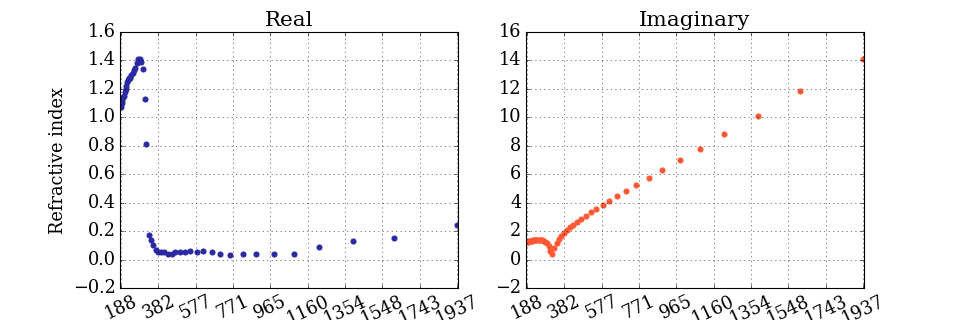

In [17]:
plot_refrac(lambda_s, n_s, k_s)

In [18]:
#lambda_s[25:30]

In [19]:
#In the range chris plot the wavelength for silver (350-420 nm)
#plot_refrac(lambda_g[25:30], n_g[25:30], k_g[25:30])

In [21]:
#Importing water data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_w , n_w , k_w = numpy.loadtxt('gold_silver_water_raw-data/water_HQ72.txt', unpack=True)
lambda_w = lambda_w*1e3 #To convert to nm

<IPython.core.display.Javascript object>


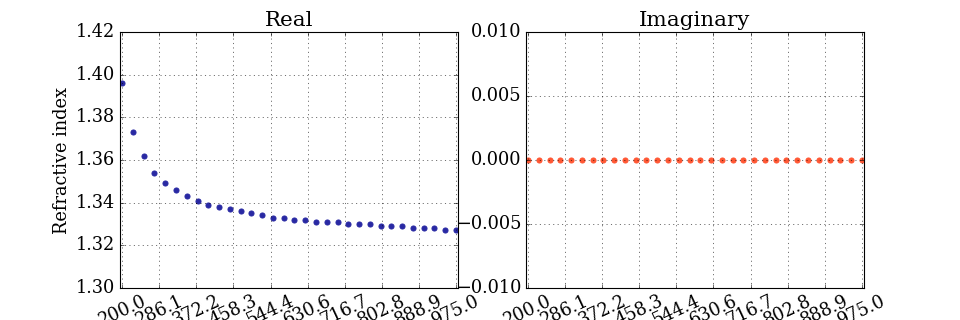

In [22]:
plot_refrac(lambda_w, n_w, k_w)

In [23]:
#lambda_w[10:15]

In [24]:
#In the range chris plot the wavelength for gold-water (460-560 nm)
#plot_refrac(lambda_w[10:15], n_w[10:15], k_w[10:15])

In [25]:
#lambda_w[5:10]

In [26]:
#In the range chris plot the wavelength for silver-water (350-420 nm)
#plot_refrac(lambda_w[5:10], n_w[5:10], k_w[5:10])